In [2]:
import numpy as np
import pandas as pd

In [4]:
x = np.array([-7,2,-3,-11,14,6,8])

In [6]:
#bucketize data

categories = pd.cut(x,4)
categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [8]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]],
              closed='right',
              dtype='interval[float64]')

In [10]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [12]:
categories.ordered

True

In [15]:
pd.cut(x,4,retbins = True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

In [19]:
#assigning categories to resulting bins

marks = np.array([70,20,30,99,40,16,80])
categories, bins = pd.cut(marks, 4, retbins = True, labels = ['poor', 'average', 'good', 'excellent'])
categories

[good, poor, poor, excellent, average, poor, excellent]
Categories (4, object): [poor < average < good < excellent]

In [21]:
#using Scikit-learn's KBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

In [23]:
marks = [[70],[20],[30],[99],[40],[16],[80]]

In [26]:
#instantiate the kbindiscretizer object

enc = KBinsDiscretizer(n_bins= 4, encode= 'ordinal', strategy= 'uniform')

In [28]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [30]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [32]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

In [34]:
x = [[-21,41,-14],
    [-13,23,-31],
    [9,20,-5],
     [0,24,-17]]

In [40]:
enc = KBinsDiscretizer(n_bins= 4, encode= 'ordinal', strategy= 'quantile')
enc.fit(x)
x_trans = enc.transform(x)
x_trans

array([[0., 3., 2.],
       [1., 1., 0.],
       [3., 0., 3.],
       [2., 2., 1.]])

In [42]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([20.  , 22.25, 23.5 , 28.25, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

In [45]:
enc.inverse_transform(x_trans)

array([[-18.   ,  34.625, -13.625],
       [-10.75 ,  22.875, -25.75 ],
       [  5.625,  21.125,  -8.375],
       [ -2.125,  25.875, -18.   ]])

In [47]:
#building regression model using descritized values

auto_df = pd.read_csv('dataset/clean_car.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302,140,3449,10.5,70,1,ford torino
4,15.0,8,429,198,4341,10.0,70,1,ford galaxie 500


In [49]:
X = auto_df[['horsepower']]
Y = auto_df['mpg']

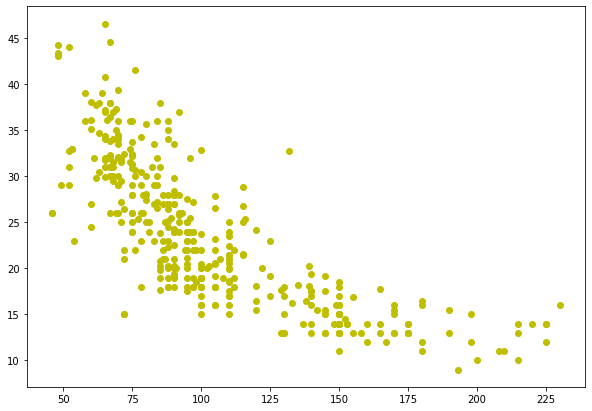

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.plot(X, Y, 'o', c='y')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [57]:
reg = LinearRegression().fit(x_train, y_train)

In [60]:
y_pred = reg.predict(x_test)
y_pred

array([26.1840824 , 30.18379602, 19.62455205, 14.98488424, 12.26507898,
       21.06444895, 18.66462078, 24.26421986,  8.26536535, 25.54412822,
       24.26421986, 24.26421986, 22.6643344 , 26.50405949, 25.06416258,
       17.06473533, 26.98402512, 32.5836242 , 23.46427713, 23.46427713,
       18.0246666 , 23.46427713, 15.46484988, 25.22415113, 30.50377311,
       17.06473533, 26.82403658, 16.2647926 , 19.4645635 , 27.78396785,
        4.26565172, 28.10394494, 28.42392203, 17.06473533, 29.3838533 ,
       32.42363565, 25.86410531, 29.3838533 , 28.74389912, 17.06473533,
       26.50405949, 30.66376166, 31.78368147, 25.06416258, 15.94481551,
       21.86439168, 22.6643344 , 29.54384184, 25.86410531, 17.86467805,
       26.1840824 , 27.46399076, 28.26393348, 22.34435731, 22.6643344 ,
       15.78482697,  6.98545699, 21.70440313, 25.86410531, 11.46513625,
       25.86410531, 27.78396785, 26.1840824 , 26.1840824 ,  5.86553717,
       25.06416258, 30.98373875, 29.54384184, 26.66404803, 28.74

In [63]:
from sklearn.metrics import r2_score

print('r_2 score is ', r2_score(y_test, y_pred))

r_2 score is  0.6113943586842318


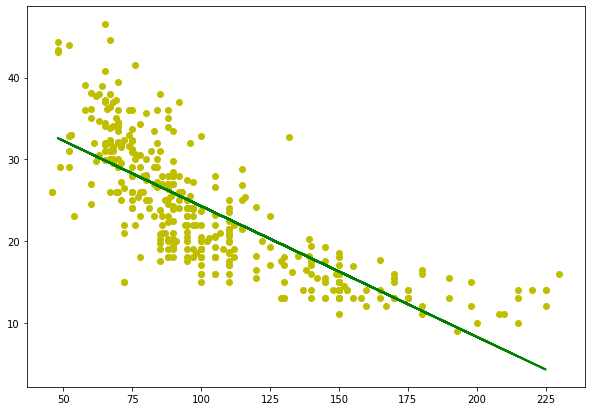

In [66]:
plt.figure(figsize = (10,7))
plt.plot(X, Y, 'o', c='y')
plt.plot(x_test, y_pred, linewidth= 2, color= 'green',
         linestyle= '-', label= 'linear regression')
plt.show()

In [69]:
enc = KBinsDiscretizer(n_bins = 20, encode = 'ordinal')
x_binned = enc.fit_transform(x_train)

In [71]:
x_binned[:10]

array([[18.],
       [10.],
       [14.],
       [ 9.],
       [ 4.],
       [17.],
       [10.],
       [ 2.],
       [10.],
       [ 0.]])

In [73]:
x_test_binned = enc.transform(x_test)

In [75]:
reg = LinearRegression().fit(x_binned, y_train)
y_pred = reg.predict(x_test_binned)
y_pred

array([25.58206744, 33.47203644, 17.69209843, 14.31068315, 13.18354472,
       18.81923686, 17.69209843, 21.07351372, 13.18354472, 23.32779058,
       21.07351372, 21.07351372, 18.81923686, 26.70920586, 23.32779058,
       16.56496   , 27.83634429, 34.59917487, 19.94637529, 19.94637529,
       17.69209843, 19.94637529, 14.31068315, 23.32779058, 34.59917487,
       16.56496   , 27.83634429, 15.43782158, 17.69209843, 28.96348272,
       13.18354472, 28.96348272, 30.09062115, 16.56496   , 32.34489801,
       34.59917487, 24.45492901, 32.34489801, 30.09062115, 16.56496   ,
       26.70920586, 34.59917487, 34.59917487, 23.32779058, 15.43782158,
       18.81923686, 18.81923686, 32.34489801, 24.45492901, 16.56496   ,
       25.58206744, 27.83634429, 28.96348272, 18.81923686, 18.81923686,
       15.43782158, 13.18354472, 18.81923686, 24.45492901, 13.18354472,
       24.45492901, 28.96348272, 25.58206744, 25.58206744, 13.18354472,
       23.32779058, 34.59917487, 32.34489801, 26.70920586, 30.09

In [77]:
r2_score(y_test, y_pred)

0.6923355679510499

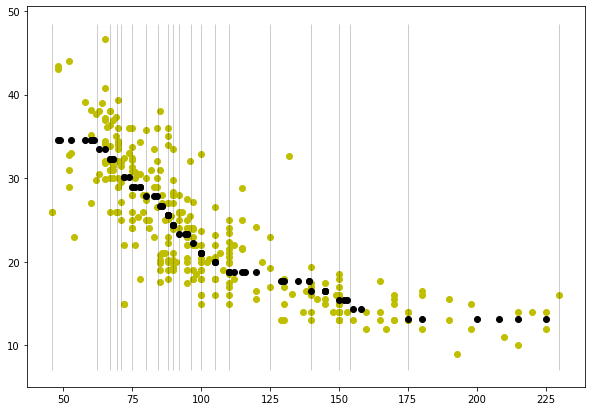

In [78]:
plt.figure(figsize = (10,7))
plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, color= 'k')
plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth = 1, alpha= .2)
plt.show()